In [ ]:
!pip install observable-jupyter

In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
#import contextily as cx
from observable_jupyter import embed

/Users/joschw/opt/anaconda3/envs/libproj/lib/python3.12/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

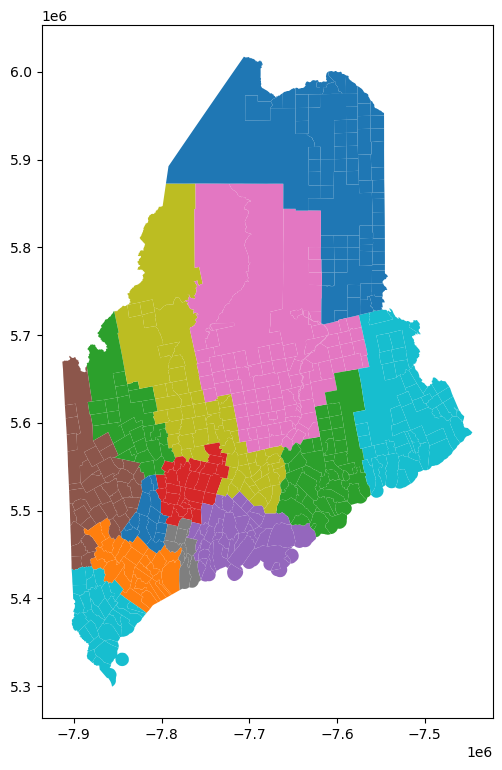

In [4]:
maine = gpd.read_file('Data/tl_rd22_23_cousub.zip')
maine_wm = maine.to_crs(epsg=3857)
maine_wm["FIPS"] = maine_wm["STATEFP"]+maine_wm["COUNTYFP"]
maine_wm.plot("FIPS", figsize=(9,9))

<Axes: >

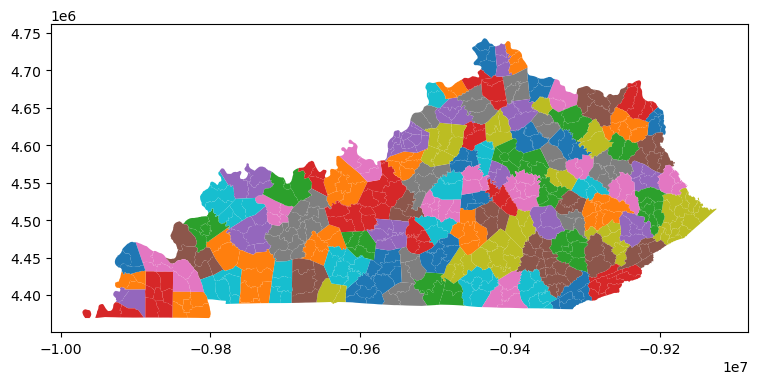

In [3]:
ky = gpd.read_file('Data/tl_rd22_21_cousub.zip')
ky_wm = ky.to_crs(epsg=3857)
ky_wm["FIPS"] = ky_wm["STATEFP"]+ky_wm["COUNTYFP"]
ky_wm.plot("FIPS", figsize=(9,9))


In [4]:
maine_wm.shape

(530, 20)

In [8]:
publibdf = pd.read_csv('Data/PLS_FY21_AE_pud21i.csv')

In [9]:
publibdf.head()

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,ZIP4,ADDRES_M,CITY_M,...,GEOSCORE,GEOMTYPE,C19CLOSE,C19PUBSV,C19ECRD2,C19REFER,C19OUTSD,C19XWIF2,C19XWIF3,C19STOTH
0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,9150,P.O. BOX 129,ANCHOR POINT,...,100.00,POINTADDRESS,N,Y,N,Y,N,N,N,N
1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,6055,3600 DENALI STREET,ANCHORAGE,...,100.00,POINTADDRESS,Y,Y,Y,Y,N,Y,N,Y
2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,M,P.O. BOX 3078,ANDERSON,...,99.62,STREETADDRESS,Y,Y,N,N,N,N,Y,N
3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,M,P.O. BOX 368,BETHEL,...,100.00,MANUAL,Y,Y,Y,Y,Y,N,N,N
4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,WASILLA,99623,9663,P.O. BOX 520829,BIG LAKE,...,99.58,POINTADDRESS,Y,Y,N,Y,Y,Y,Y,N


In [19]:
notebook = "@d3/u-s-state-capitals"

In [20]:
embed(notebook, cells=["map", "data"])

In [51]:
data = []
for row in publibdf.index:
    lon = publibdf['LONGITUD'][row]
    lat = publibdf['LATITUDE'][row]
    place = publibdf['LIBNAME'][row]
    entry = {'name': 'fart', 'description': place, 'latitude': lat, 'longitude': lon}
    data.append(entry)

In [52]:
print(data[1])

{'name': 'fart', 'description': 'ANCHORAGE PUBLIC LIBRARY', 'latitude': 61.1870715, 'longitude': -149.8764562}


In [57]:
test = data[0:150]
print(test)

[{'name': 'fart', 'description': 'ANCHOR POINT PUBLIC LIBRARY', 'latitude': 59.77966731, 'longitude': -151.8315926}, {'name': 'fart', 'description': 'ANCHORAGE PUBLIC LIBRARY', 'latitude': 61.1870715, 'longitude': -149.8764562}, {'name': 'fart', 'description': 'ANDERSON COMMUNITY LIBRARY', 'latitude': 64.34374942, 'longitude': -149.1744083}, {'name': 'fart', 'description': 'KUSKOKWIM CONSORTIUM LIBRARY', 'latitude': 60.79058917, 'longitude': -161.7736923}, {'name': 'fart', 'description': 'BIG LAKE PUBLIC LIBRARY', 'latitude': 61.54772359, 'longitude': -149.8186701}, {'name': 'fart', 'description': 'CANTWELL COMMUNITY LIBRARY', 'latitude': 63.3923707, 'longitude': -148.8948017}, {'name': 'fart', 'description': 'CHINIAK PUBLIC LIBRARY', 'latitude': 57.6122436, 'longitude': -152.2335921}, {'name': 'fart', 'description': 'COLD BAY PUBLIC LIBRARY', 'latitude': 55.20719778, 'longitude': -162.7143121}, {'name': 'fart', 'description': 'COOPER LANDING COMMUNITY LIBRARY', 'latitude': 60.49398903

In [58]:
embed(notebook, cells=["map"], inputs={"data": test})